In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from specific_func import downloading_json_file, split_json_to_dfs
import numpy as np

In [2]:
covid_json = "https://covid.ourworldindata.org/data/owid-covid-data.json"
response = downloading_json_file(covid_json)

In [3]:
country_information, country_key, combined_df = split_json_to_dfs(response)

In [4]:
drop_option = country_key['location'].to_list()

In [5]:
today = combined_df['date'].max()
print("Data last updated: {}".format(str(today.date())))

Data last updated: 2020-11-11


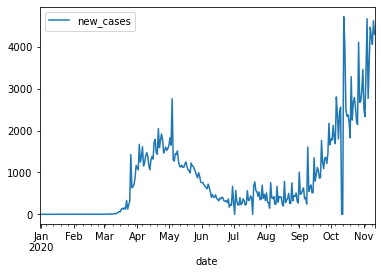

In [6]:
country_select = "Canada"
combined_df[combined_df.location == country_select].plot('date', 'new_cases')
plt.show()

In [7]:
combined_df[combined_df['new_cases'] < 0].head()

,date,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,...,new_tests_per_thousand,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent
5570,2020-05-20,Benin,-209.0,0.0,-17.240,0.000,57.41,-28.143,0.000,-2.321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
15093,2020-05-07,Ecuador,-2461.0,49.0,-139.488,2.777,86.11,677.857,105.000,38.421,...,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America
15095,2020-05-09,Ecuador,-1480.0,50.0,-83.886,2.834,86.11,354.571,91.571,20.097,...,0.049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America
15098,2020-05-12,Ecuador,-50.0,18.0,-2.834,1.020,86.11,-338.857,82.286,-19.206,...,0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America
15216,2020-09-07,Ecuador,-8261.0,3800.0,-468.229,215.382,70.83,-552.000,567.000,-31.287,...,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America


In [8]:
combined_df['new_cases'] = np.where(combined_df['new_cases'] <0, None, combined_df['new_cases'])

In [9]:
combined_df[combined_df['new_cases'] < 0].head()

,date,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,...,new_tests_per_thousand,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent


In [10]:
np.nan

nan

In [11]:
type(np.nan)

float